# Bike Rental Regression Project

## Introduction:
This Jupyter Notebook documents the steps taken in building a regression model to predict bike rentals. The goal is to create an accurate model that can estimate the number of bike rentals based on various features. 

## Step 1: Data Exploration
We began by exploring the dataset to gain insights into our data. This involved examining the data's structure, checking for missing values, and visualizing key features to understand their distributions.

## Step 2: Data Engineering
Data engineering was crucial for preparing our data for modeling. This step included handling missing data, encoding categorical variables, and normalizing features. Additionally, we applied a log transformation to deal with negative predictions.

## Step 3: Initial Model - XGBoost
We started with an initial regression model using XGBoost, a robust and efficient algorithm for regression tasks.

## Step 4: Model Improvement( in jupyter note book Bike Rental Version 2)
To enhance our XGBoost model, we applied a log transformation to the target variable to mitigate negative predictions.

## Step 5: Trying Different Models
In pursuit of better results, we experimented with various regression models beyond XGBoost. This included testing different algorithms to identify the most suitable one for our dataset.

## Step 6: Model Comparison
We compared the performance of different models using evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to determine the best-performing model.

## Additional Considerations:
### Feature Engineering:
We considered feature engineering techniques to potentially improve model performance.
### Hyperparameter Tuning:
Fine-tuning of hyperparameters was carried out to optimize model performance.
###  Cross-Validation:
Cross-validation techniques were employed to prevent overfitting and provide robust model assessment.
### Model Interpretability:
Depending on project requirements, we explored model interpretability for insights into prediction factors.

### Conclusion:
This Jupyter Notebook presents a structured approach to building a regression model for bike rental prediction. By following these steps and considering additional techniques, we aim to develop a reliable model for estimating bike rentals.


# Good luck with the project!


### The dataset source:  https://www.kaggle.com/competitions/bike-sharing-demand/data

In [41]:
# import necessory library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

## different  model 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

##
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

## uploading data 

In [42]:
train_path = "bike-sharing-demand/train.csv"
test_path = "bike-sharing-demand/test.csv"
df_train = pd.read_csv(train_path, index_col = [0], parse_dates=['datetime'])
df_test= pd.read_csv(test_path, index_col = [0], parse_dates=['datetime'])

In [43]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Exploration

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


# Add new feature based on datetime index

In [45]:
## Season feature 
df_train['season'].unique()
df_train.groupby('season').count()
#Spring = 1, summer = 2, Autunm = 3, Winter = 4 

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,
1,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686
2,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
3,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
4,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734


In [46]:
## Holiday feature 
df_train['holiday'].unique()
df_train.groupby('holiday').count()

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
holiday,,,,,,,,,,
0,10575,10575,10575,10575,10575,10575,10575,10575,10575,10575
1,311,311,311,311,311,311,311,311,311,311


In [47]:
## workingday 
df_train.groupby('workingday').count()

,season,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count
workingday,,,,,,,,,,
0,3474,3474,3474,3474,3474,3474,3474,3474,3474,3474
1,7412,7412,7412,7412,7412,7412,7412,7412,7412,7412


## weather:
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [48]:
df_train.groupby('weather').count()

,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
weather,,,,,,,,,,
1,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
2,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
3,859,859,859,859,859,859,859,859,859,859
4,1,1,1,1,1,1,1,1,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

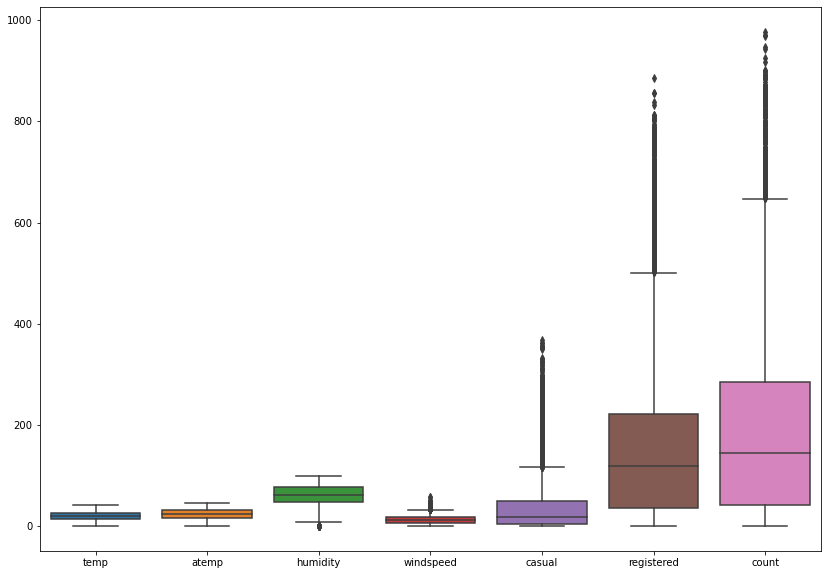

In [49]:
# Distribution 
plt.figure(figsize=(14,10))
sns.boxplot(data=df_train[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])

<AxesSubplot:xlabel='temp', ylabel='Count'>

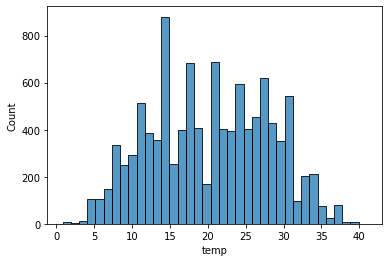

In [50]:
sns.histplot(data = df_train, x= 'temp')

<AxesSubplot:xlabel='atemp', ylabel='Count'>

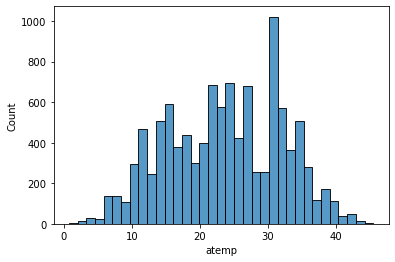

In [51]:
sns.histplot(data = df_train, x= 'atemp')

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

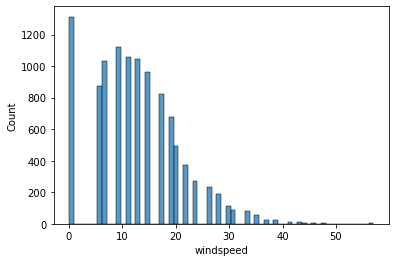

In [52]:
sns.histplot(data = df_train, x= 'windspeed')

<AxesSubplot:xlabel='humidity', ylabel='Count'>

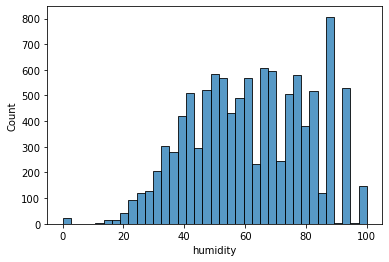

In [53]:
sns.histplot(data = df_train, x= 'humidity')

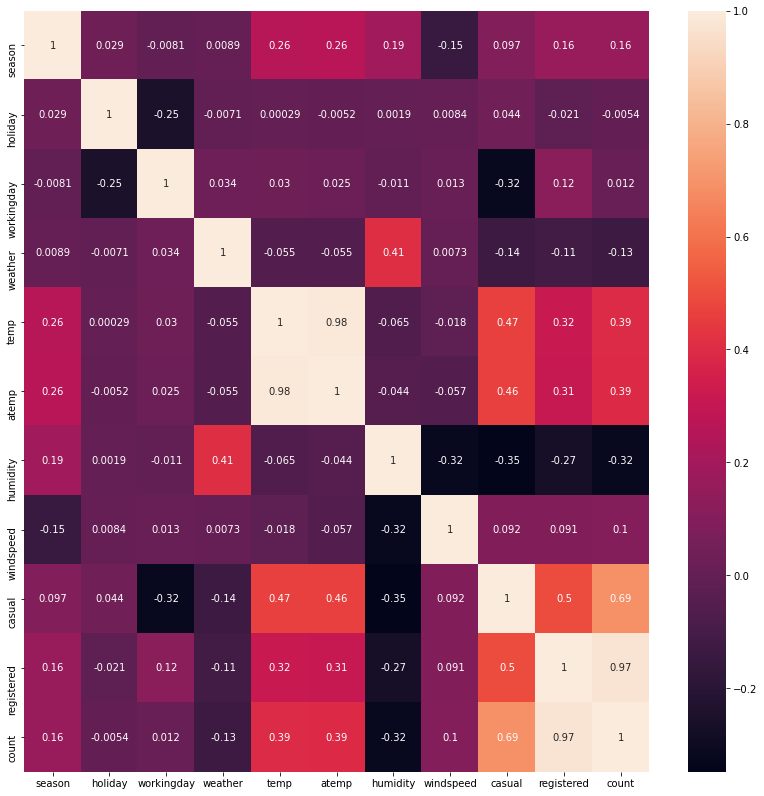

In [54]:
plt.figure(figsize=(14,14))
sns.heatmap(df_train.corr(),annot= True);

## Heatmap and Correlation Analysis:
The heatmap and correlation analysis reveal valuable insights about the relationships between various features in our dataset.

### 1. Temperature (atem) vs. Temperature (temp):
As expected, there is a strong positive correlation of 0.98 between atmospheric temperature (atem) and temperature (temp). This indicates that these two variables move almost in lockstep, which is a logical relationship.

### 2.Humidity vs. Biking Preference:
The data suggests that humidity has a negative correlation of -0.32 with biking. In other words, people tend to avoid biking when humidity levels are high. This negative correlation aligns with our intuition, as biking in humid conditions can be uncomfortable.

### 3.Casual Bikers vs. Working Day:
A notable finding is the highly inverse relationship between casual biking and working day. This observation is entirely logical: casual biking tends to occur more on non-working days when people have leisure time.

### 4.Weather Impact on Bike Count:
Another significant insight is the impact of weather on bike rental counts. It appears that people are less inclined to bike in hot weather, which is reflected in the data. This negative correlation between weather conditions and bike count highlights the influence of weather on biking preferences.

## Feature Engineering

In [55]:
def new_feature(df): 
    df['year']= df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [57]:
new_feature(df_train)
new_feature(df_test)

In [56]:
season = pd.get_dummies(df_train['season'], prefix='Season')
df_train= pd.concat([df_train, season], axis= 1)

season = pd.get_dummies(df_test['season'], prefix='Season')
df_test= pd.concat([df_test, season], axis= 1)

weather = pd.get_dummies(df_train['weather'], prefix = 'weather')
df_train = pd.concat([df_train, weather], axis= 1)

weather = pd.get_dummies(df_test['weather'], prefix = 'weather')
df_test = pd.concat([df_test, weather], axis= 1)

df_train = df_train.drop(['weather', 'season'], axis = 1 )
df_test = df_test.drop(['weather', 'season'], axis =1 )


In [58]:
df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,Season_1,...,Season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,1,0,0,0,2011,1,1,5,0
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,1,0,0,0,2011,1,1,5,1
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,1,0,0,0,2011,1,1,5,2
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,1,0,0,0,2011,1,1,5,3
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,1,0,0,0,2011,1,1,5,4


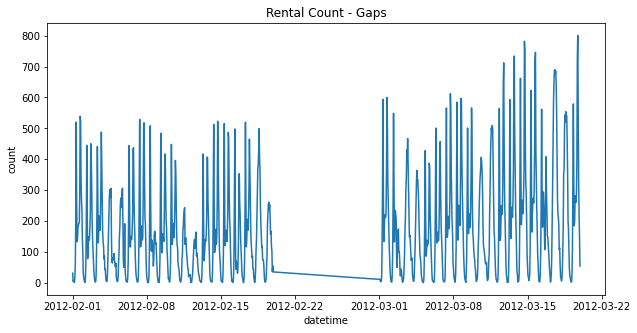

In [59]:
plt.figure(figsize=(10, 5))  # Optional: Set the figure size

# Filter the DataFrame for the desired date range
filtered_df = df_train.loc['2012-02':'2012-03']

# Plot the data using Seaborn
sns.lineplot(data=filtered_df, x=filtered_df.index, y='count')

plt.title('Rental Count - Gaps')

plt.show()


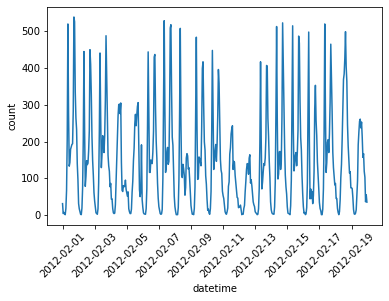

In [60]:
df_monthly = df_train.loc['2012-02']
sns.lineplot(data = df_monthly, x = df_monthly.index, y = 'count')
plt.xticks(rotation=45);

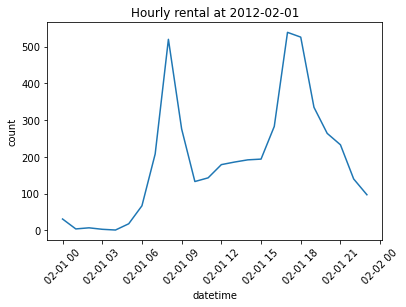

In [61]:
df_hourly = df_train.loc['2012-02-01']
sns.lineplot(data = df_hourly, x = df_hourly.index, y ='count')
plt.title('Hourly rental at 2012-02-01')
plt.xticks(rotation=45);

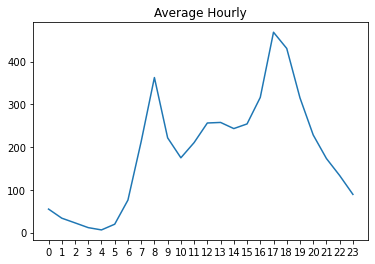

In [62]:
group_hour= (df_train.groupby(['hour'])['count']).mean()
plt.plot(group_hour)
plt.title('Average Hourly')
plt.xticks(range(24));

In [63]:
df_2011 = df_train.loc['2011']
df_2012 = df_train.loc['2012']

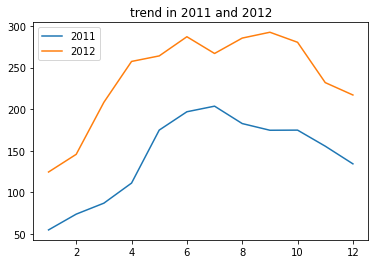

In [64]:
df_2011_groupby_month = df_2011.groupby('month')['count'].mean()
df_2012_groupby_month = df_2012.groupby('month')['count'].mean()
plt.plot(df_2011_groupby_month, label='2011')
plt.plot(df_2012_groupby_month, label = '2012')
plt.title('trend in 2011 and 2012')
plt.legend()

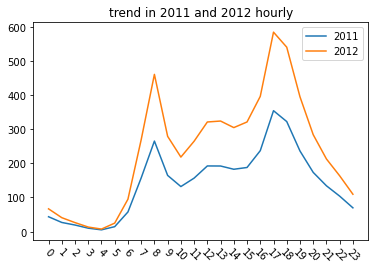

In [65]:
df_2011_groupby_hour = df_2011.groupby('hour')['count'].mean()
df_2012_groupby_hour = df_2012.groupby('hour')['count'].mean()
plt.plot(df_2011_groupby_hour, label='2011')
plt.plot(df_2012_groupby_hour, label = '2012')
plt.title('trend in 2011 and 2012 hourly')
plt.xticks(range(24), rotation = -45)
plt.legend()

In [66]:
df_workingday = df_train.groupby(['workingday', 'hour'])['count'].mean()

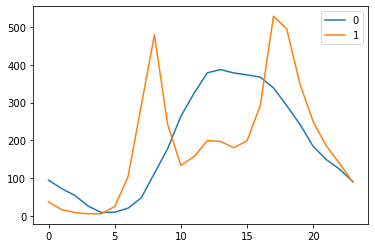

In [67]:
plt.plot(df_workingday.loc[0], label = '0' )
plt.plot(df_workingday.loc[1], label ='1')
plt.legend()

In [69]:
df_train.corr()['count']

holiday      -0.005393
workingday    0.011594
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Season_1     -0.237704
Season_2      0.075681
Season_3      0.136942
Season_4      0.023704
weather_1     0.105246
weather_2    -0.041329
weather_3    -0.117519
weather_4    -0.001459
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

<AxesSubplot:xlabel='temp', ylabel='count'>

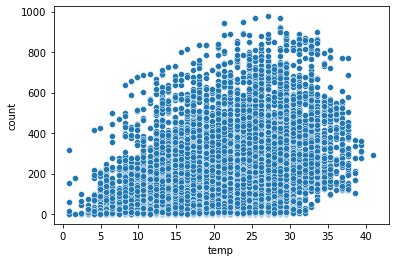

In [70]:
sns.scatterplot(data = df_train, x = 'temp', y = 'count')

<AxesSubplot:xlabel='atemp', ylabel='count'>

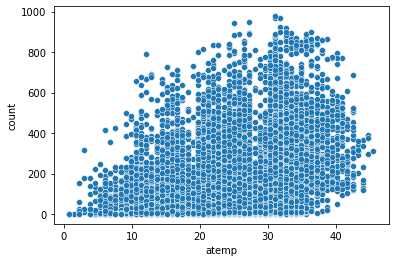

In [71]:
sns.scatterplot(data = df_train, x = 'atemp', y = 'count')

<AxesSubplot:xlabel='humidity', ylabel='count'>

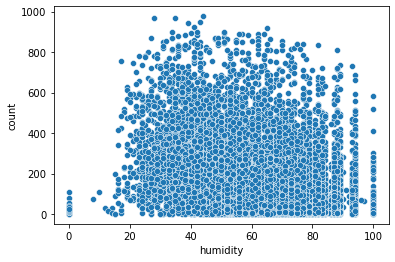

In [72]:
sns.scatterplot(data = df_train, x = 'humidity', y = 'count')

In [108]:
# Train _ Validation 

In [109]:
y = df_train['count']
X = df_train.drop(['count','registered', 'casual'],axis =1 )

In [110]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)

## modeling 

In [111]:
rmsle_models = {}

In [112]:
# Random Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_predict=model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_predict, y_val))
rmsle_models['RandomForestRegressor'] = rmsle
rmsle

0.320626911452789

In [113]:

model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_predict=model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_predict, y_val))
rmsle_models['AdaBoostRegressor'] = rmsle
rmsle

1.014491737603313

In [114]:
# Random Regressor
model = BaggingRegressor()
model.fit(X_train, y_train)
y_predict=model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_predict, y_val))
rmsle_models['BaggingRegressor'] = rmsle
rmsle

0.335262439061254

In [115]:
# Random Regressor
model = SVR()
model.fit(X_train, y_train)
y_predict=model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_predict, y_val))
rmsle_models['SVR'] = rmsle
rmsle

1.461804992636965

In [116]:
print(rmsle_models)

{'RandomForestRegressor': 0.320626911452789, 'AdaBoostRegressor': 1.014491737603313, 'BaggingRegressor': 0.335262439061254, 'SVR': 1.461804992636965}


### tuning model
lass sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [117]:
# Random Regressor
model = RandomForestRegressor(n_estimators=500)
model

RandomForestRegressor(n_estimators=500)

In [119]:
model.fit(X_train, y_train)
y_predict=model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_predict, y_val))
rmsle_models['RandomForestRegressor_improved'] = rmsle
rmsle

0.31959081602794964